# Exploratory Data Analysis of Heart Disesases

The dataset used contains the data of 303 patients from a hospital in Cleveland described by 14
attributes each; 5 of which were numerical values while the other 9 represented categories. The ”goal” field was given by a binary value representing the presence or absence of heart disease in the patient. This dataset had some missing values which were represented by a '?'. The features used are age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting electrocardiogram, maximum heart rate, exercise induced angina, ST depression, ST slope, number of major vessels and Thallium stress test results.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [6]:
def load_dataset(path):
    names = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestingECG',
             'MaxHeartRate', 'ExerciseInducedAngina', 'ST_depression', 'ST_slope', 'NumMajorVessels',
             'ThalliumStressTest', 'Diagnosis']

    # separate the numerical from the categorical values
    numerical = [
        'Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'ST_depression'
    ]
    categorical = [
        'Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'ST_slope',
        'NumMajorVessels', 'ThalliumStressTest', 'Diagnosis'
    ]

    # the result(num) is changed to binary (0=no heart problems; 1=heart problems) and the '?' is considered NaN
    data = pd.read_csv(path, names=names, na_values='?', converters={'Diagnosis': lambda x: int(int(x) > 0)})

    # replace the rows with NaN results with the median
    data = fill(data, numerical, categorical)

    return data, data[numerical], data[categorical]


def fill(data, numerical, categorical):
    for feature in categorical:
        data.fillna(data[feature].value_counts().index[0], inplace=True)

    for feature in numerical:
        data.fillna(data[feature].mean(), inplace=True)

    return data

    
data, data_numerical, data_categorical = load_dataset("DATA/processed.cleveland.data")

In [7]:
# shows the categorical data as name instead of value
def pretty_data(df):
    df.loc[df.Sex == 1, 'Sex'] = "Male"
    df.loc[df.Sex == 0, 'Sex'] = "Female"

    df.loc[df.ChestPainType == 1, 'ChestPainType'] = "Typical angina"
    df.loc[df.ChestPainType == 2, 'ChestPainType'] = "Atypical angina"
    df.loc[df.ChestPainType == 3, 'ChestPainType'] = "Non-angina"
    df.loc[df.ChestPainType == 4, 'ChestPainType'] = "Asymptomatic"

    df.loc[df.FastingBloodSugar == 0, 'FastingBloodSugar'] = "< 120 mg/dl"
    df.loc[df.FastingBloodSugar == 1, 'FastingBloodSugar'] = "> 120 mg/dl"

    df.loc[df.RestingECG == 0, 'RestingECG'] = "Normal"
    df.loc[df.RestingECG == 1, 'RestingECG'] = "ST-wave abnorm."
    df.loc[df.RestingECG == 2, 'RestingECG'] = "left ventr. hypertrophy"

    df.loc[df.ExerciseInducedAngina == 0, 'ExerciseInducedAngina'] = "No"
    df.loc[df.ExerciseInducedAngina == 1, 'ExerciseInducedAngina'] = "Yes"

    df.loc[df.ST_slope == 1, 'ST_slope'] = "Upsloping"
    df.loc[df.ST_slope == 2, 'ST_slope'] = "Flat"
    df.loc[df.ST_slope == 3, 'ST_slope'] = "Downsloping"

    df.loc[df.ThalliumStressTest == 3, 'ThalliumStressTest'] = "Normal"
    df.loc[df.ThalliumStressTest == 6, 'ThalliumStressTest'] = "Fixed defect"
    df.loc[df.ThalliumStressTest == 7, 'ThalliumStressTest'] = "Reversible defect"

    df.loc[df.Diagnosis == 0, 'Diagnosis'] = "No disease"
    df.loc[df.Diagnosis == 1, 'Diagnosis'] = "Disease"

    return df

data_pd = pretty_data(data.copy())
data_categorical = pretty_data(data_categorical.copy())

data_pd

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,ST_depression,ST_slope,NumMajorVessels,ThalliumStressTest,Diagnosis
0,63.0,Male,Typical angina,145.0,233.0,> 120 mg/dl,left ventr. hypertrophy,150.0,No,2.3,Downsloping,0.0,Fixed defect,No disease
1,67.0,Male,Asymptomatic,160.0,286.0,< 120 mg/dl,left ventr. hypertrophy,108.0,Yes,1.5,Flat,3.0,Normal,Disease
2,67.0,Male,Asymptomatic,120.0,229.0,< 120 mg/dl,left ventr. hypertrophy,129.0,Yes,2.6,Flat,2.0,Reversible defect,Disease
3,37.0,Male,Non-angina,130.0,250.0,< 120 mg/dl,Normal,187.0,No,3.5,Downsloping,0.0,Normal,No disease
4,41.0,Female,Atypical angina,130.0,204.0,< 120 mg/dl,left ventr. hypertrophy,172.0,No,1.4,Upsloping,0.0,Normal,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,Male,Typical angina,110.0,264.0,< 120 mg/dl,Normal,132.0,No,1.2,Flat,0.0,Reversible defect,Disease
299,68.0,Male,Asymptomatic,144.0,193.0,> 120 mg/dl,Normal,141.0,No,3.4,Flat,2.0,Reversible defect,Disease
300,57.0,Male,Asymptomatic,130.0,131.0,< 120 mg/dl,Normal,115.0,Yes,1.2,Flat,1.0,Reversible defect,Disease
301,57.0,Female,Atypical angina,130.0,236.0,< 120 mg/dl,left ventr. hypertrophy,174.0,No,0.0,Flat,1.0,Normal,Disease


In [8]:
data.describe()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,ST_depression,ST_slope,NumMajorVessels,ThalliumStressTest,Diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.676568,4.709571,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931963,1.956854,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [9]:
data.groupby('Diagnosis').size()

Diagnosis
0    164
1    139
dtype: int64


Percentage of patience without heart problems: 54.13
Percentage of patience with heart problems: 45.87


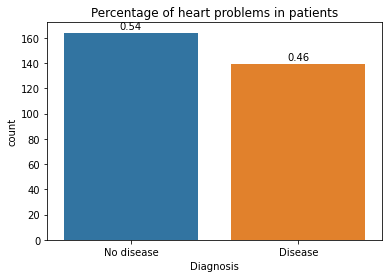

In [10]:
def percentage_general(data):
    ax = sns.countplot(data["Diagnosis"])
    num_count = data.Diagnosis.value_counts()

    # for showing the percentage
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}'.format(height / data.shape[0]), ha="center")
    plt.title("Percentage of heart problems in patients")
    
    print("\nPercentage of patience without heart problems: " + str(round(num_count[0] * 100 / 303, 2)))
    print("Percentage of patience with heart problems: " + str(round(num_count[1] * 100 / 303, 2)))

percentage_general(data_pd)

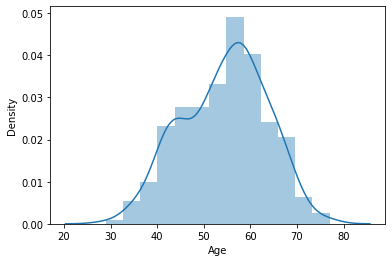

In [11]:
#age distribution
sns.distplot(data['Age'])

In [12]:
#data correlation
data.corr()["Diagnosis"].abs().sort_values(ascending=False)

Diagnosis                1.000000
ThalliumStressTest       0.516569
NumMajorVessels          0.455280
ExerciseInducedAngina    0.431894
ST_depression            0.424510
MaxHeartRate             0.417167
ChestPainType            0.414446
ST_slope                 0.339213
Sex                      0.276816
Age                      0.223120
RestingECG               0.169202
RestingBloodPressure     0.150825
Cholesterol              0.085164
FastingBloodSugar        0.025264
Name: Diagnosis, dtype: float64

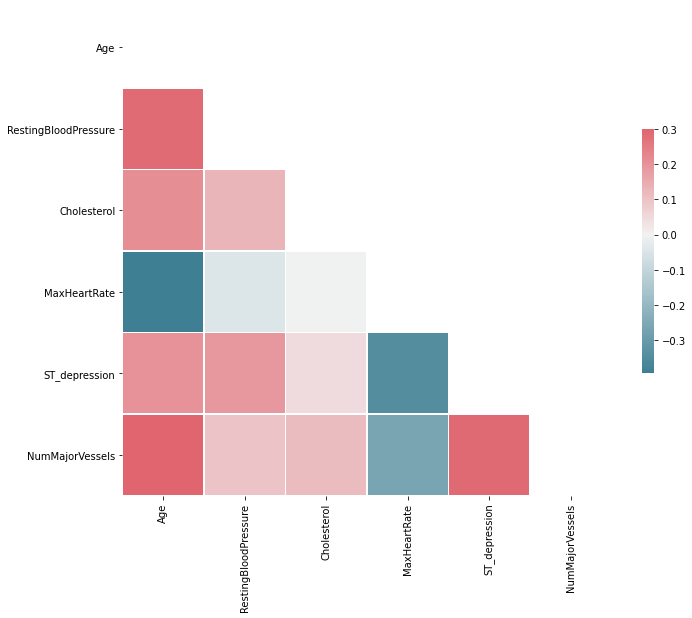

In [13]:
#correlation heat map
def correlation(data):
    corr = data.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
                
correlation(data_pd)

Age                        AxesSubplot(0.125,0.657941;0.227941x0.222059)
RestingBloodPressure    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Cholesterol             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
MaxHeartRate               AxesSubplot(0.125,0.391471;0.227941x0.222059)
ST_depression           AxesSubplot(0.398529,0.391471;0.227941x0.222059)
NumMajorVessels         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

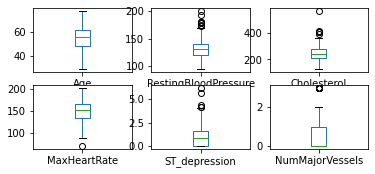

In [14]:
#box diagrams
data_pd.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c52e4c5b0>,
      dtype=object)

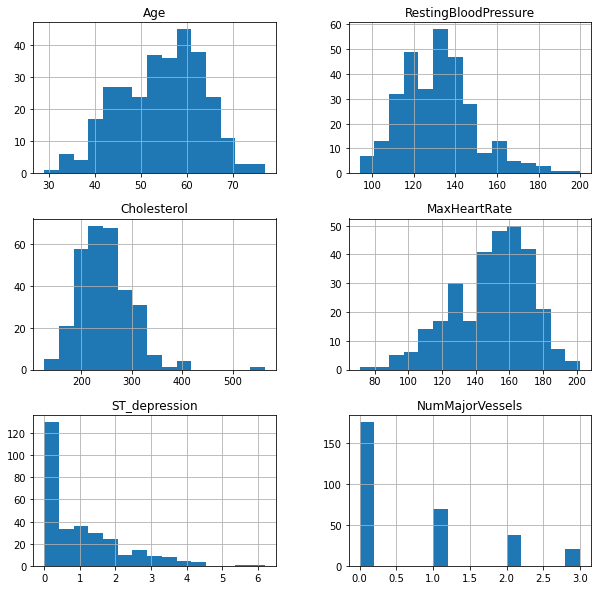

In [15]:
#numeric
data_pd.hist(bins=15, figsize=(10, 10), layout=(3, 2))

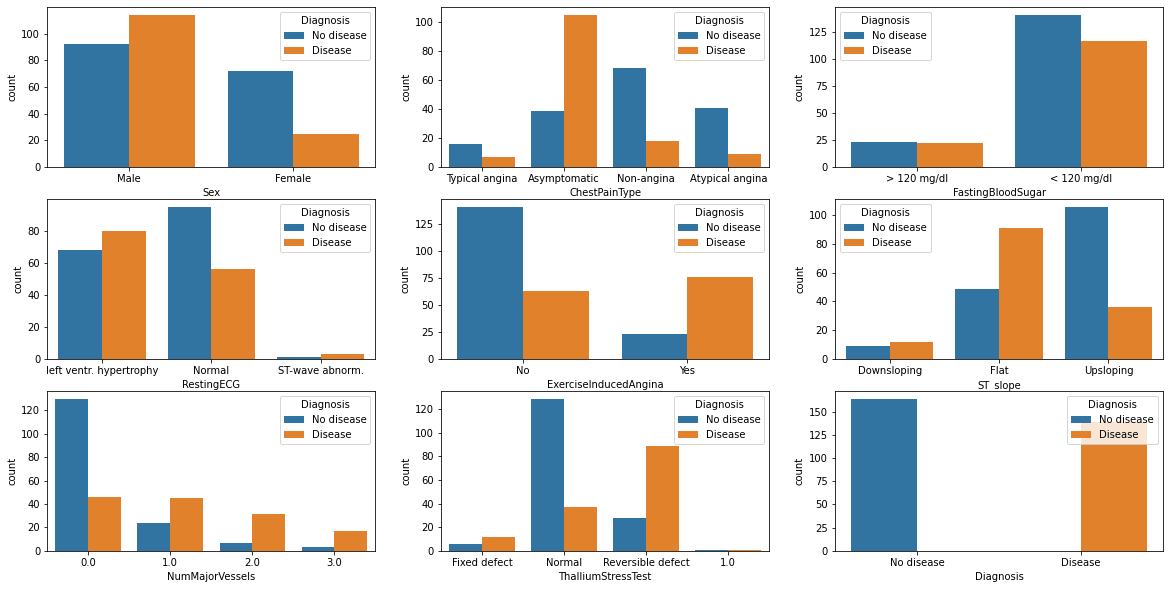

In [16]:
#categorical parameters histogram
def view_categorical(data):
    fig, ax = plt.subplots(3, 3, figsize=(20, 10))

    for variable, subplot in zip(data.columns, ax.flatten()):
        sns.countplot(data[variable], ax=subplot, hue=data['Diagnosis'])

view_categorical(data_categorical)

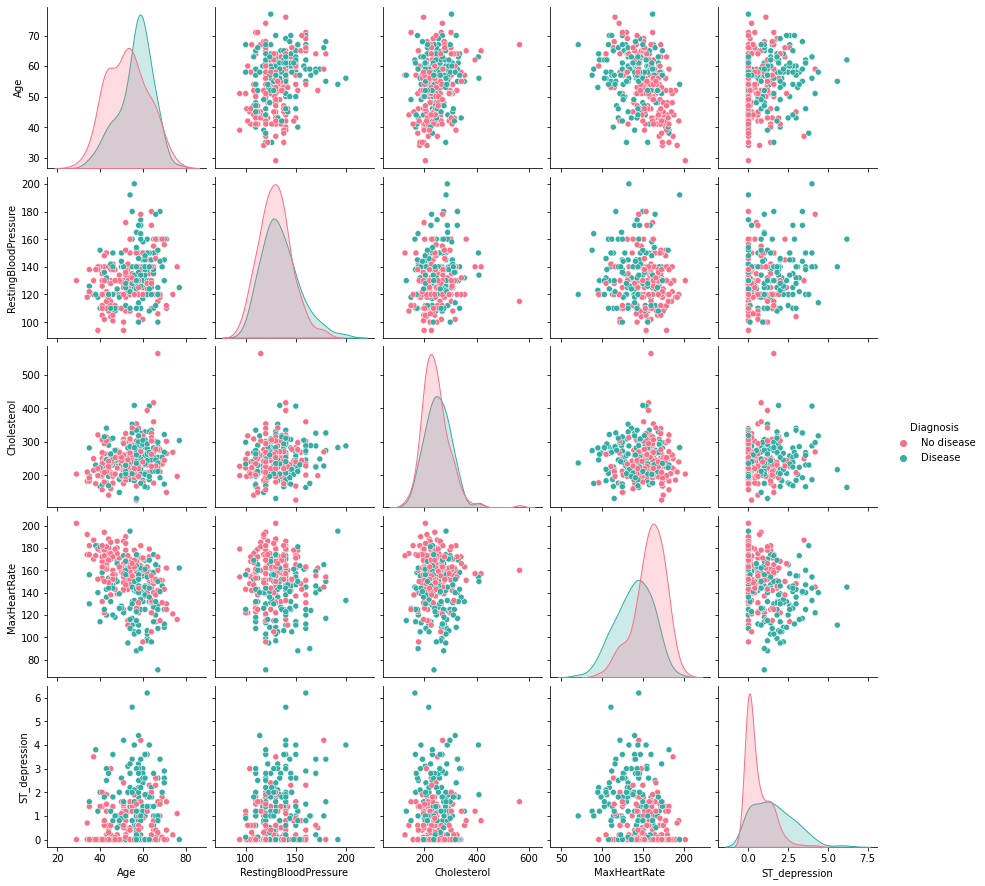

In [17]:
#scatter pairs
sns.pairplot(data_numerical.join(data_pd['Diagnosis']), hue="Diagnosis", palette="husl")

In [18]:
def outliers(data):
    z = np.abs(stats.zscore(data))
    threshold = 3
    res = np.where(z > threshold)

    outliers_row = []
    for j in res[0]:
        r = []
        for i in data.columns:
            r.append(data[i][j])
        outliers_row.append(r)

    return pd.DataFrame(data=outliers_row, columns=data.columns)

outliers(data)

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,ST_depression,ST_slope,NumMajorVessels,ThalliumStressTest,Diagnosis
0,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0
1,62.0,0.0,4.0,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0,1
2,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,1
3,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,1
4,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,1
5,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
6,56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,1.9,2.0,2.0,7.0,1
7,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
8,67.0,1.0,4.0,120.0,237.0,0.0,0.0,71.0,0.0,1.0,2.0,0.0,3.0,1
